In [2]:
# libs for data analysis
import pandas as pd
import numpy as np
import missingno as msno
import pandas_profiling as pp
from pprint import pprint
import tqdm 
# Progress bar
from pandas import Panel
tqdm.tqdm.pandas()

# Libs for visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# System libs
import os
from subprocess import check_output

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# import xgboost

/Users/lyanalexandr/OneDrive/Projects/Programming/Python/Kaggle/Fraud_detection/venv/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
# loading dataframe
fd = pd.read_csv('creditcard.csv')

### Table of content
- Data Overview
- Questions and Hypothesis
- Data Exploration
- Data Preprocessing
- Imputation of missing values
- Model Selection
- Model Preprocessing
- Data Validation

# Data Overview

In [4]:
fd.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223578,143438.0,-5.256434,0.364541,-5.412085,2.400031,0.697301,-1.998755,-5.835532,-0.887739,-2.828287,...,-0.648259,0.511285,-1.110045,0.178987,0.220235,-0.699809,0.580487,-0.173630,8.90,1
265834,162066.0,-0.590214,0.830972,2.350347,-0.257461,-0.334258,-0.658561,0.598444,-0.122264,0.473222,...,-0.197082,-0.269911,-0.259324,0.386922,0.258302,-0.696336,0.186866,-0.076842,1.00,0
37824,39126.0,0.169289,1.343310,0.114810,1.156315,0.228364,-0.176694,-0.136729,-1.743236,-0.990326,...,1.433084,-0.697028,-0.173224,-0.062397,0.957028,0.700298,0.171402,0.222332,0.76,0
7258,9632.0,-1.686816,-0.166146,2.466077,-2.793447,0.100864,-1.169867,0.336598,-0.508042,2.908429,...,-0.033874,0.533639,-0.541618,0.450181,0.636840,-0.335362,-0.547059,0.028356,41.51,0
237145,149119.0,-0.795254,1.416160,-0.456403,-1.120239,1.123168,-0.182660,1.221493,-0.302488,0.722533,...,-0.497036,-0.691346,0.077213,-0.015145,-0.140660,0.147910,0.546030,0.113427,17.99,0


In [5]:
fd.shape

(284807, 31)

In [6]:
fd.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
pp.ProfileReport(fd, minimal=True)

In [15]:
fd.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
fd.isnull().sum().to_frame().rename(columns={0:'count'})

,count
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [19]:
fd.dtypes.value_counts()

float64    30
int64       1
dtype: int64

### Duplicated Data

In [41]:
# Dataset has 1081 duplicates

In [ ]:
fd.duplicated().sum()

In [ ]:
# Duplicated rows
fd[fd.index.isin(fd.duplicated().to_frame().index)]

In [42]:
fd.drop_duplicates(inplace=True)

In [45]:
fd.duplicated().sum()

0

## Conclusion

In [35]:
cor = fd.corr()

In [39]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = fd.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


# Preprocessing

<AxesSubplot:xlabel='Amount'>

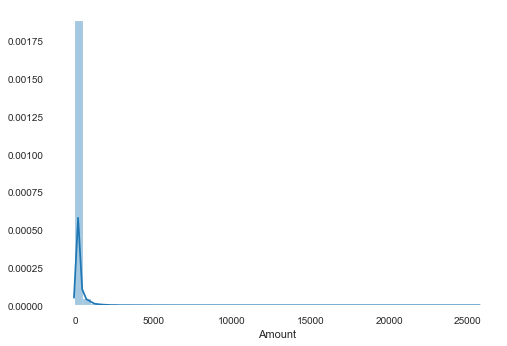

In [100]:
sns.distplot(fd['Amount'], hist=True)

In [101]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [103]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [110]:
(fd['Class'].value_counts()/len(fd)).to_frame()

,Class
0,0.998333
1,0.001667


### Data Observations

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

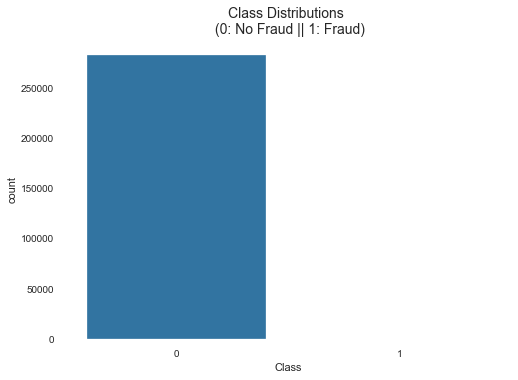

In [111]:
sns.countplot('Class', data=fd)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

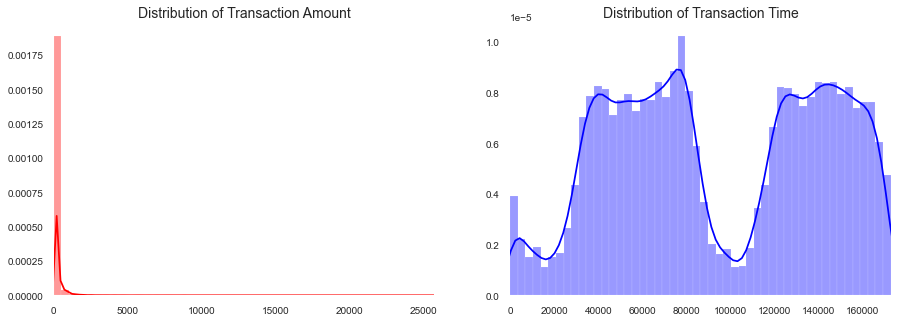

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
amount_val = fd['Amount'].values
time_val = fd['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

---
Due to distributions of Amount and Time, we can highlight skewness of data.
In order to prevent affection of skewness on data, we are using scaling.
---

### Data Scaling

In [115]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [116]:
# RobustScaler in less prone to Outliers

In [137]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

fd['scaled_amount'] = rob_scaler.fit_transform(fd['Amount'].values.reshape(-1, 1))
fd['scaled_time'] = rob_scaler.fit_transform(fd['Time'].values.reshape(-1, 1))

In [140]:
fd.drop(['Time','Amount'], axis=1, inplace=True)

In [141]:
fd.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

In [143]:
fd = fd[['scaled_amount', 'scaled_time','V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']]

In [144]:
fd

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.295230,1.035258,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,0.038798,1.035270,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,0.638020,1.035282,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.166875,1.035282,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


# Splitting the data

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(fd['Class'].value_counts()[0]/len(fd) * 100,2), '% of the dataset')
print('Frauds', round(fd['Class'].value_counts()[1]/len(fd) * 100,2), '% of the dataset')

X = fd.drop('Class', axis=1)
y = fd['Class']

# For checking kfold
sk = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Splitting data into 5 stratified folds 
for train_index, test_index in sk.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# What is the difference betseen StratifiedKFOLD and KFOLD?

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30191  30261  30275 ... 283723 283724 283725] Test: [    0     1     2 ... 56805 56806 56807]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 30191  30261  30275 ... 113535 113536 113537]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 77084  77379  79220 ... 170292 170293 170294]
Train: [     0      1      2 ... 283723 283724 283725] Test: [149302 150027 150068 ... 226999 227000 227001]
Train: [     0      1      2 ... 226999 227000 227001] Test: [212341 212365 213905 ... 283723 283724 283725]


### Turning into Arrays

In [162]:
original_Xtest = original_Xtest.values
original_ytest = original_ytest.values
original_Xtrain = original_Xtrain.values
original_ytrain = original_ytrain.values

In [164]:
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)

In [167]:
print(train_counts_label/len(original_Xtrain))

[0.99833907 0.00166093]


## Random under sampling

In [171]:
# Shuffling the data before creating subsamples
fd = fd.sample(frac=True)

# amount of fraud classes 492 rows

fraud_df = fd.loc[fd['Class'] == 1]
non_fraud_df = fd.loc[fd['Class'] == 0][:len(fraud_df)]

normal_dist_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows

new_df = normal_dist_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
201098,-0.305938,0.576291,1.176633,3.141918,-6.140445,5.521821,1.768515,-1.727186,-0.932429,0.292797,...,0.329568,0.129372,-0.803021,-0.074098,-0.031084,0.375366,0.065897,0.488258,0.325872,1
274382,-0.305938,0.955287,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,...,2.493224,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,1
258042,-0.271311,0.866937,0.172238,0.840583,-0.065972,-0.634725,0.996813,-0.488687,1.140478,-0.300720,...,0.103400,0.368344,1.451315,-0.150641,0.810297,-0.824854,-0.305340,0.340160,0.096860,0
231978,-0.194688,0.732203,-2.064240,2.629739,-0.748406,0.694992,0.418178,1.392520,-1.697801,-6.333065,...,-1.424486,6.215514,-1.276909,0.459861,-1.051685,0.209178,-0.319859,0.015434,-0.050117,1
9035,-0.292032,-0.847253,-2.589617,7.016714,-13.705407,10.343228,-2.954461,-3.055116,-9.301289,3.349573,...,1.488855,1.887738,0.333998,0.287659,-1.186406,-0.690273,0.631704,1.934221,0.789687,1


In [180]:
new_df['Class'].value_counts()/len(new_df)

1    0.5
0    0.5
Name: Class, dtype: float64

---
- 'New df' is normally distributed
---

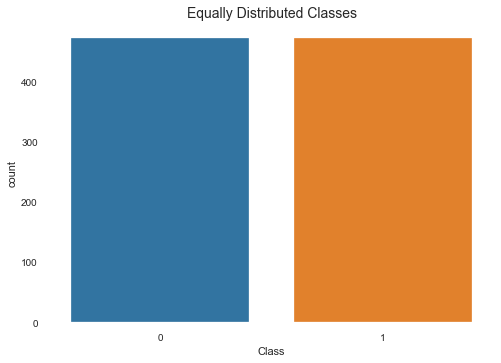

In [182]:
sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

## Removing outliers

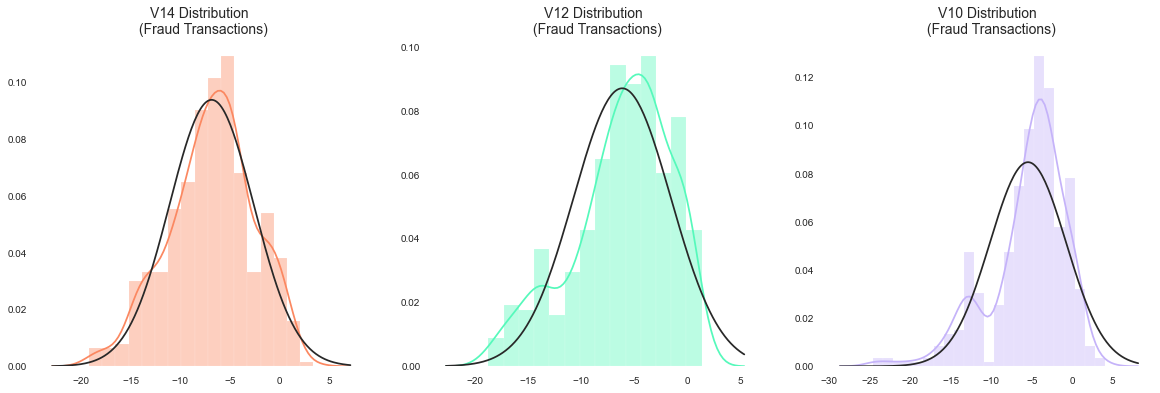

In [183]:
from scipy.stats import norm

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [294]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -8.812193050563222 | Quartile 75: -4.090031397318092
iqr: 4.72216165324513
Cut Off: 7.083242479867694
V14 Lower: -15.895435530430916
V14 Upper: 2.9932110825496023
Feature V14 Outliers for Fraud Cases: 3
V10 outliers:[-17.230202160711, 3.4424219959421496, -16.3375959447735]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -14.846499234986263
V12 Upper: 4.7189642607597175
V12 outliers: [-15.5316111795156, -15.479052483201599, -15.969207520809, -15.717606646877199, -15.0941631493865, -16.218610393127]
Feature V12 Outliers for Fraud Cases: 6
Number of Instances after outliers removal: 891
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -11.834889883961182
V10 Upper: 3.5440214055923738
V10 outliers: [-13

In [186]:
from plotly import graph_objects as go
from plotly import subplots

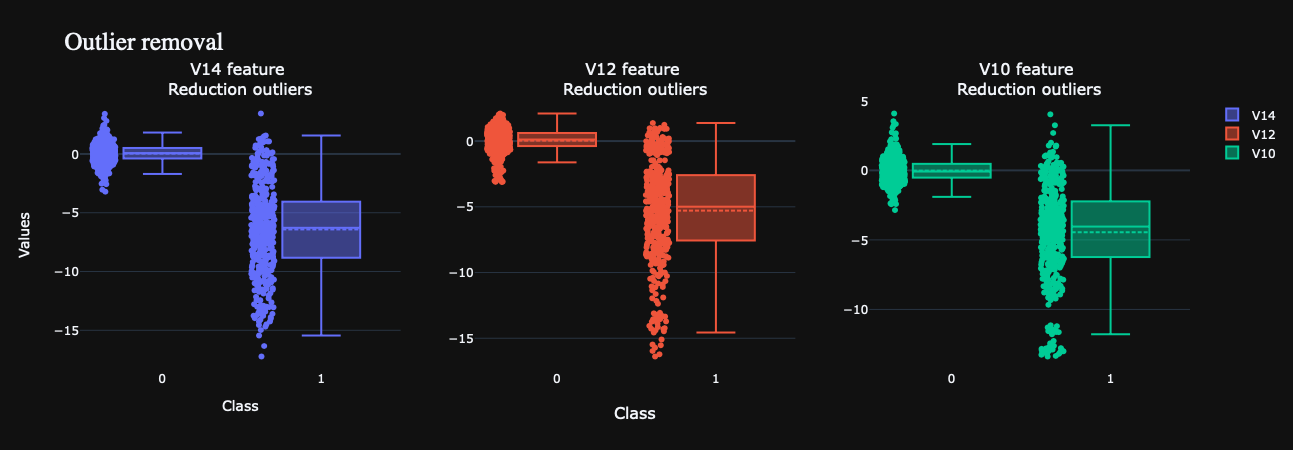

In [245]:
# Making figure with three graphs in one line.
# https://plotly.github.io/
fig = subplots.make_subplots(1, 3, x_title='Class', column_titles=['V14 feature <br> Reduction outliers', 'V12 feature <br> Reduction outliers', 'V10 feature <br> Reduction outliers'])

# Adding graphs
fig.add_trace(dict(x=np.array(new_df["Class"]), 
                   y=np.array(new_df["V14"]),
                   boxmean=True,
                   boxpoints="all",
                   type='box',
                  name="V14"), 
              row=1, col=1)

fig.add_trace(dict(x=np.array(new_df["Class"]), 
                   y=np.array(new_df["V12"]),
                   type='box',
                   boxmean=True,
                   boxpoints="all",
                  name="V12"),
              row=1, col=2)

fig.add_trace(dict(x=np.array(new_df["Class"]), 
                   y=np.array(new_df["V10"]),
                    type='box',
                   boxmean=True,
                   boxpoints="all",
                  name="V10"),
              row=1, col=3)
fig.update_layout(
    template="plotly_dark",
    title= {'text': 'Outlier removal',
           'font': {'family': "Droid Serif",
                   'size': 25},
            'xanchor': 'left',
           'pad': {'t': 100,
                  'b': 50}
           },
    xaxis={'title': {'text': 'Class'},
          'position': 1,
          'visible': True},
    yaxis={'title': {'text': 'Values'}},
    )


fig.show()

---
### Notes

- Using plotly, get used to low-level plotly, using graph_objects.Figure (long-term usability for dash as well)
- adding traces, u can use properties of graphs (go.scatter, go.box, go.chloropleth and etc) and adding type
 - or u can use directly graphs with graph_object
 - input data is array

#### Figure out more:
 - add_traces
 - update_layout

#### Usefull links:
- https://plotly.com/python-api-reference/generated/plotly.html#plotly.basedatatypes.BaseFigure.add_trace

Properties of layout
- https://plotly.com/python-api-reference/generated/plotly.graph_objects.Layout.html#plotly.graph_objects.Layout

Properties of propertis of layout
- https://plotly.com/python/reference/layout/#layout-title-pad
---


# Dimensionality reduction and clustering

In [247]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time

In [295]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print('T-SNE execution time: {:.2}'.format(t1-t0))

# PCA implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print('PCA execution time: {:.2}'.format(t1-t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print('SVD execution time: {:.2} secs'.format(t1-t0))


T-SNE execution time: 6.4
PCA execution time: 0.0043
SVD execution time: 0.0049 secs


In [253]:
X_reduced_pca

array([[ 33.966385 ,  -3.104674 ],
       [-16.00431  , -14.30573  ],
       [-14.780744 ,   8.201527 ],
       ...,
       [ 25.238548 , -13.816857 ],
       [ -4.991997 ,  -3.7055905],
       [ 34.82309  , -28.099472 ]], dtype=float32)

In [305]:
fig = subplots.make_subplots(1, 3, subplot_titles=['T-SNE', 'PCA', 'SVD'])

In [306]:
col = [X_reduced_tsne, X_reduced_pca, X_reduced_svd]

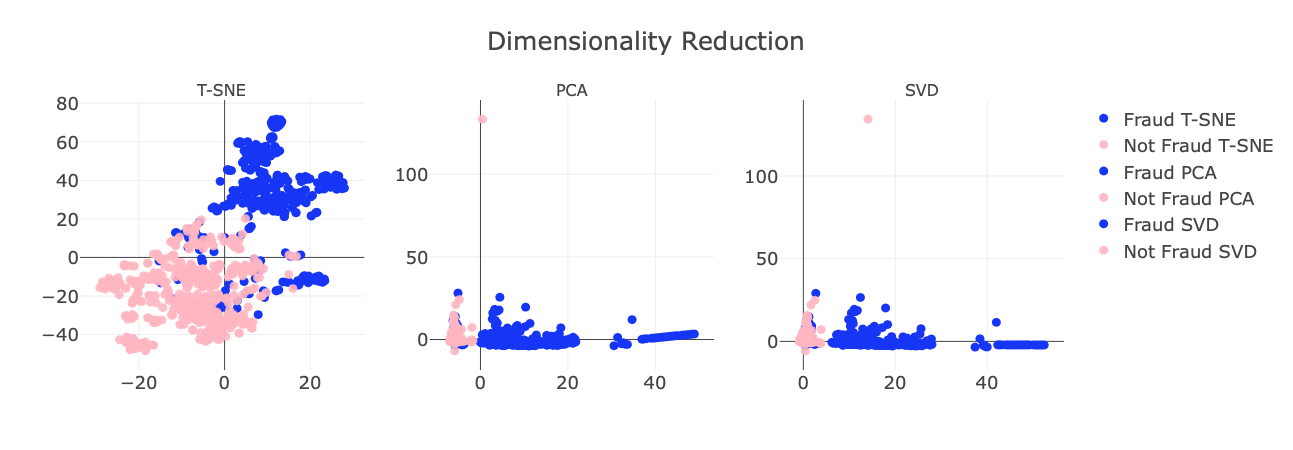

In [307]:
legend_names = ['T-SNE', 'PCA', 'SVD']
for num, data in enumerate(col):
    fig.add_traces([go.Scatter(x=data[y==1][:, 0], 
                             y=data[y==1][:, 1],
                            mode='markers',
                            name=f'Fraud {legend_names[num]}',
                            showlegend=True,
                            marker_color='#1735F5'),
                   go.Scatter(x=data[y==0][:, 0], 
                             y=data[y==0][:, 1],
                            mode='markers',
                            name=f'Not Fraud {legend_names[num]}',
                            showlegend=True,
                            marker_color='rgba(255, 182, 193, .9)')],
                  rows=1, cols=num+1)
    
# Plotly templates
# https://plotly.com/python/templates/
fig.update_layout(
    template="presentation",
    title= {'text': 'Dimensionality Reduction',
            },
    )

fig.show()

# Model Selection

In [309]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [310]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [311]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [313]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [315]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"Classifiers: {classifier.__class__.__name__} Has a training score of {round(training_score.mean(), 2) * 100}% accuracy score")

Classifiers: LogisticRegression Has a training score of 94.0% accuracy score
Classifiers: KNeighborsClassifier Has a training score of 92.0% accuracy score
Classifiers: SVC Has a training score of 93.0% accuracy score
Classifiers: DecisionTreeClassifier Has a training score of 90.0% accuracy score


### Selection best parameters

In [316]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [318]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.69%
Knears Neighbors Cross Validation Score 92.39%
Support Vector Classifier Cross Validation Score 93.25%
DecisionTree Classifier Cross Validation Score 92.54%


### My part

In [321]:
c = [int(x) for x in np.linspace(0.001, 100, 50)]

In [334]:
# Using RandomizedGridSearch
from sklearn.model_selection import RandomizedSearchCV

# Logistic Regression

log_reg_params = {'penalty': ['l1', 'l2'], 
                 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# KneighborsClassifier

knear_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knear = RandomizedSearchCV(KNeighborsClassifier(), knear_params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
grid_knear.fit(X_train, y_train)
knears_neighbors = grid_knear.best_estimator_

# Support Vector Classifier
svc_params = {'C': [x for x in np.linspace(0.01, 10, 20)], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

grid_svc = RandomizedSearchCV(SVC(), svc_params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], 
               "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   48.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.1s finished


In [338]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.69%
Knears Neighbors Cross Validation Score 92.25%
Support Vector Classifier Cross Validation Score 92.82%
DecisionTree Classifier Cross Validation Score 92.83%


In [343]:
grid_log_reg

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   random_state=42, verbose=2)

# ROC-AUC metrics

In [344]:
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_predict

# log regression prediction
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method='decision_function')

# KNeighbors prediction
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

# SVC prediction
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)

# Decision tree prediction
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [347]:
# ROC-AUC score
print(f'Logistic Regression: {roc_auc_score(y_train, log_reg_pred):.2f}')
print(f'KNears Neighbors: {roc_auc_score(y_train, knears_pred):.2f}')
print(f'Support Vector Classifier: {roc_auc_score(y_train, svc_pred):.2f}')
print(f'Decision Tree Classifier: {roc_auc_score(y_train, tree_pred):.2f}')

Logistic Regression: 0.97
KNears Neighbors: 0.92
Support Vector Classifier: 0.92
Decision Tree Classifier: 0.92


### ROC AUC curve

In [348]:
log_fpr, log_tpr, log_threshold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

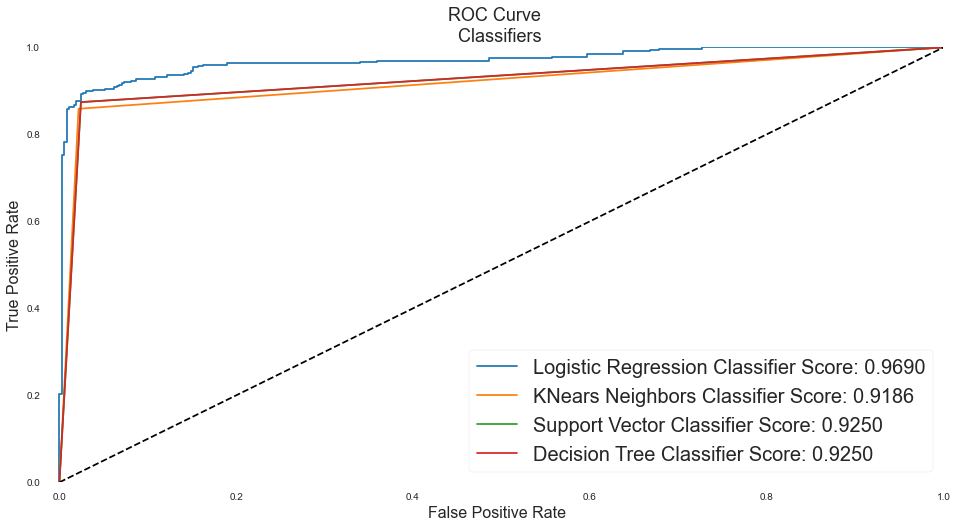

In [356]:
plt.figure(figsize=(16,8))
plt.title('ROC Curve \n Classifiers', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc=4, prop={'size': 20})
    
plt.show()

### Precision Recall metrics

In [357]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

y_pred = log_reg.predict(X_train)

recall_metrics = recall_score(y_train, y_pred)
precision_metrics = precision_score(y_train, y_pred)
f1_metrics = f1_score(y_train, y_pred)
accuracy_metrics = accuracy_score(y_train, y_pred)

In [359]:
print(f'Recall Score: {recall_metrics:.2f}')
print(f'Precision Score: {precision_metrics:.2f}')
print(f'F1 Score: {f1_metrics:.2f}')
print(f'Accuracy Score: {accuracy_metrics:.2f}')

Recall Score: 0.91
Precision Score: 0.98
F1 Score: 0.94
Accuracy Score: 0.95
